In [86]:
import pandas as pd
import numpy as np

from scipy.stats import beta

import pylab as plt

from mpmath import betainc   # integral de beta

In [3]:
control = pd.read_csv("control.csv")

In [6]:
tamaño = pd.read_csv("tamaño.csv")

In [9]:
control["Tiempo_cat"] = ["lento" if i >= 81 else "rápido" for i in control.Tiempo]

In [8]:
control.Tiempo.mean() # media tiempo control para categorizar

81.0

In [12]:
tamaño["Tiempo_cat"] = ["lento" if i >= 81 else "rápido" for i in tamaño.Tiempo]

## Variables Control

In [77]:
control.head(10)

,Prueba,Scroll,Exito,Ruta_1_Reco,Ruta_2_Quizz,Tiempo,Tiempo_cat
0,Test_1,si,no,si,no,180,lento
1,Test_2,no,si,si,no,60,rápido
2,Test_3,si,si,no,si,75,rápido
3,Test_4,si,si,no,si,47,rápido
4,Test_5,si,si,no,si,48,rápido
5,Test_6,si,no,no,no,101,lento
6,Test_7,no,si,si,no,65,rápido
7,Test_8,si,si,no,si,41,rápido
8,Test_9,si,no,no,si,108,lento
9,Test_10,si,si,no,si,85,lento


In [17]:
control_exito_no = control[control.Exito == "no"]

In [18]:
control_exito_si = control[control.Exito == "si"]

In [20]:
control_tiempo_rapido = control[control.Tiempo_cat == "rápido"]

In [21]:
control_tiempo_lento = control[control.Tiempo_cat == "lento"]

In [24]:
control_ruta1_no = control[control["Ruta_1_Reco"] == "no"]

In [25]:
control_ruta1_si = control[control["Ruta_1_Reco"] == "si"]

In [26]:
control_ruta2_no = control[control["Ruta_2_Quizz"] == "no"]

In [28]:
control_ruta2_si = control[control["Ruta_2_Quizz"] == "si"]

In [30]:
control_scroll_si = control[control.Scroll == "si"]

In [31]:
controll_scroll_no = control[control.Scroll == "no"]

In [45]:
beta_control_scroll = beta(len(control_scroll_si) + 1, len(controll_scroll_no) + 1)

In [47]:
beta_control_exito = beta(len(control_exito_si) + 1, len(control_exito_no) + 1)

In [48]:
beta_control_tiempo = beta(len(control_tiempo_rapido) + 1, len(control_tiempo_lento) + 1)

In [50]:
beta_control_ruta1 = beta(len(control_ruta1_si) + 1, len(control_ruta1_no) + 1)

In [51]:
beta_control_ruta2 = beta(len(control_ruta2_si) + 1, len(control_ruta2_no) + 1)

## Variables tamaño

In [38]:
tamaño.head(10)

,Prueba,Scroll,Exito,Ruta_1_Reco,Ruta_2_Quizz,Tiempo,Tiempo_cat
0,Test_1,si,no,no,no,39,rápido
1,Test_2,si,si,no,si,60,rápido
2,Test_3,si,si,no,si,30,rápido
3,Test_4,no,si,si,no,40,rápido
4,Test_5,si,si,no,si,38,rápido
5,Test_6,no,si,si,no,55,rápido
6,Test_7,si,si,no,si,35,rápido
7,Test_8,no,si,si,no,90,lento
8,Test_9,si,si,si,no,60,rápido
9,Test_10,si,si,no,si,42,rápido


In [32]:
tamaño_exito_no = tamaño[tamaño.Exito == "no"]

In [35]:
tamaño_exito_si = tamaño[tamaño.Exito == "si"]

In [36]:
tamaño_tiempo_rapido = tamaño[tamaño.Tiempo_cat == "rápido"]

In [37]:
tamaño_tiempo_lento = tamaño[tamaño.Tiempo_cat == "lento"]

In [39]:
tamaño_ruta1_no = tamaño[tamaño["Ruta_1_Reco"] == "no"]

In [40]:
tamaño_ruta1_si = tamaño[tamaño["Ruta_1_Reco"] == "si"]

In [41]:
tamaño_ruta2_no = tamaño[tamaño["Ruta_2_Quizz"] == "no"]

In [42]:
tamaño_ruta2_si = tamaño[tamaño["Ruta_2_Quizz"] == "si"]

In [53]:
tamaño_scroll_si = tamaño[tamaño.Scroll == "si"]

In [54]:
tamaño_scroll_no = tamaño[tamaño.Scroll == "no"]

In [55]:
beta_tamaño_scroll = beta(len(tamaño_scroll_si) + 1, len(tamaño_scroll_no) + 1)

In [56]:
beta_tamaño_exito = beta(len(tamaño_exito_si) + 1, len(tamaño_exito_no) + 1)

In [57]:
beta_tamaño_tiempo = beta(len(tamaño_tiempo_rapido) + 1, len(tamaño_tiempo_lento) + 1)

In [58]:
beta_tamaño_ruta1 = beta(len(tamaño_ruta1_si) + 1, len(tamaño_ruta1_no) + 1)

In [59]:
beta_tamaño_ruta2 = beta(len(tamaño_ruta2_si) + 1, len(tamaño_ruta2_no) + 1)

## Control VS Tamaño

In [109]:
x=np.linspace(0.7, 0.9, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

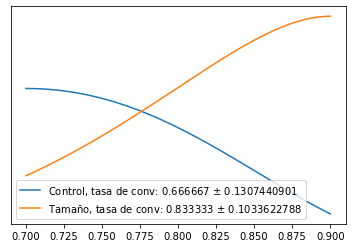

In [110]:
plot([beta_control_exito, beta_tamaño_exito], ['Control', 'Tamaño'])

In [111]:
prob_exito_vstamaño=betainc(len(tamaño_exito_si), len(tamaño_exito_no), 0.78, 1, regularized=True)

prob_exito_vstamaño=float(prob_exito_vstamaño)

prob_exito_vstamaño

0.8931310790867154

In [115]:
salto_exito=(beta_tamaño_exito.mean() - beta_control_exito.mean())/beta_control_exito.mean()

In [124]:
f"Ha mejorado el test en un {(salto_exito*100).round()} por ciento comparado con el grupo control con una probabilidad de {round(prob_exito_vstamaño, 5)*100} por ciento"

'Ha mejorado el test en un 25.0 por ciento comparado con el grupo control con una probabilidad de 89.313 por ciento'

In [129]:
x=np.linspace(0.6, 0.9, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

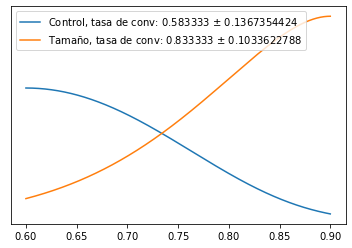

In [130]:
plot([beta_control_tiempo, beta_tamaño_tiempo], ['Control', 'Tamaño'])

In [131]:
prob_tiempo_vstamaño=betainc(len(tamaño_tiempo_rapido), len(tamaño_tiempo_lento), 0.74, 1, regularized=True)

prob_tiempo_vstamaño=float(prob_tiempo_vstamaño)

prob_tiempo_vstamaño

0.9334595892249206

In [132]:
salto_tiempo=(beta_tamaño_tiempo.mean() - beta_control_tiempo.mean())/beta_control_tiempo.mean()

In [136]:
f"Ha mejorado el test en un {(salto_tiempo*100).round(2)} por ciento comparado con el grupo control con una probabilidad de {round(prob_tiempo_vstamaño, 4)*100} por ciento"

'Ha mejorado el test en un 42.86 por ciento comparado con el grupo control con una probabilidad de 93.35 por ciento'

## Variables color

In [138]:
color = pd.read_csv("color.csv")

In [139]:
color_exito_no = color[color.Exito == "no"]

In [140]:
color_exito_si = color[color.Exito == "si"]

In [141]:
color["Tiempo_cat"] = ["lento" if i >= 81 else "rápido" for i in color.Tiempo]

In [148]:
color.head(10)

,Prueba,Scroll,Exito,Ruta_1_Reco,Ruta_2_Quizz,Tiempo,Tiempo_cat
0,Test_1,no,si,si,no,120,lento
1,Test_2,si,si,no,si,40,rápido
2,Test_3,no,si,si,no,25,rápido
3,Test_4,si,si,no,si,49,rápido
4,Test_5,si,si,si,no,70,rápido
5,Test_6,no,si,si,no,25,rápido
6,Test_7,no,si,si,no,18,rápido
7,Test_8,si,si,no,si,120,lento
8,Test_9,si,si,no,si,50,rápido
9,Test_10,si,si,si,no,69,rápido


In [143]:
color_tiempo_rapido = color[color.Tiempo_cat == "rápido"]

In [144]:
color_tiempo_lento = color[color.Tiempo_cat == "lento"]

In [146]:
beta_color_exito = beta(len(color_exito_si) + 1, len(color_exito_no) + 1)

In [147]:
beta_color_tiempo = beta(len(color_tiempo_rapido) + 1, len(color_tiempo_lento) + 1)

## Color VS Tamaño

In [153]:
x=np.linspace(0.8, 0.9, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

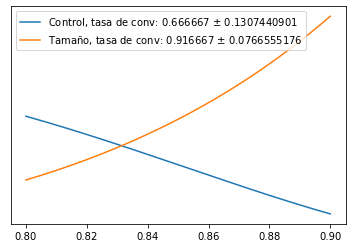

In [154]:
plot([beta_control_exito, beta_color_exito], ['Control', 'Tamaño'])

In [195]:
prob_exito_vscolor=betainc(len(color_exito_si), len(color_exito_no), 0.82, 1, regularized=True)

prob_exito_vscolor = float(prob_exito_vscolor)

prob_exito_vscolor

nan

In [180]:
salto_exito_c=(beta_color_exito.mean() - beta_control_exito.mean())/beta_control_exito.mean()

In [189]:
f"Ha mejorado el test en un {(salto_exito_c*100).round(2)} por ciento comparado con el grupo control con una probabilidad de {prob_exito_vscolor} por ciento"

'Ha mejorado el test en un 37.5 por ciento comparado con el grupo control con una probabilidad de nan por ciento'

In [172]:
x=np.linspace(0.65, 0.72, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

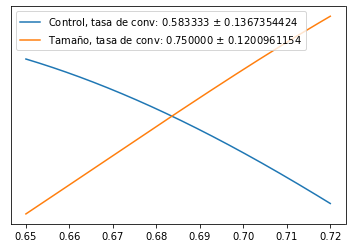

In [173]:
plot([beta_control_tiempo, beta_color_tiempo], ['Control', 'Tamaño'])

In [176]:
prob_tiempo_vscolor=betainc(10, 0, 0.682, 1, regularized=True)

prob_tiempo_vscolor = float(prob_tiempo_vscolor)

In [177]:
salto_tiempo_c=(beta_color_tiempo.mean() - beta_control_tiempo.mean())/beta_control_tiempo.mean()

In [178]:
f"Ha mejorado el test en un {(salto_tiempo_c*100).round(2)} por ciento comparado con el grupo control con una probabilidad de {round(prob_tiempo_vscolor, 4)*100} por ciento"

'Ha mejorado el test en un 28.57 por ciento comparado con el grupo control con una probabilidad de nan por ciento'

## Variable banner

In [196]:
banner = pd.read_csv("banner.csv")

In [197]:
banner["Tiempo_cat"] = ["lento" if i >= 81 else "rápido" for i in banner.Tiempo]

In [200]:
banner.head(10)

,Prueba,Scroll,Exito,Ruta_1_Reco,Ruta_2_Quizz,Tiempo,Tiempo_cat
0,Test_1,si,si,no,si,28,rápido
1,Test_2,si,si,no,si,30,rápido
2,Test_3,si,no,si,no,65,rápido
3,Test_4,si,si,no,si,49,rápido
4,Test_5,si,si,no,si,30,rápido
5,Test_6,no,si,si,no,19,rápido
6,Test_7,si,si,no,si,19,rápido
7,Test_8,si,si,no,si,36,rápido
8,Test_9,no,si,si,no,33,rápido


In [198]:
banner_exito_no = banner[banner.Exito == "no"]

In [199]:
banner_exito_si = banner[banner.Exito == "si"]

In [201]:
banner_tiempo_rapido = banner[banner.Tiempo_cat == "rápido"]

In [202]:
banner_tiempo_lento = banner[banner.Tiempo_cat == "lento"]

In [203]:
beta_banner_exito = beta(len(banner_exito_si) + 1, len(banner_exito_no) + 1)

In [204]:
beta_banner_tiempo = beta(len(banner_tiempo_rapido) + 1, len(banner_tiempo_lento) + 1)

## Banner VS Tiempo

In [208]:
x=np.linspace(0.7, 0.9, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

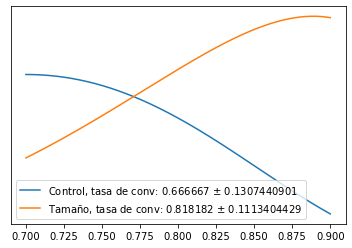

In [209]:
plot([beta_control_exito, beta_banner_exito], ['Control', 'Tamaño'])

In [213]:
prob_exito_vsbanner=betainc(len(banner_exito_si), len(banner_exito_no), 0.775, 1, regularized=True)

prob_exito_vsbanner = float(prob_exito_vsbanner)

In [214]:
salto_exito_b=(beta_banner_exito.mean() - beta_control_exito.mean())/beta_control_exito.mean()

In [215]:
f"Ha mejorado el test en un {(salto_exito_b*100).round(2)} por ciento comparado con el grupo control con una probabilidad de {prob_exito_vsbanner} por ciento"

'Ha mejorado el test en un 22.73 por ciento comparado con el grupo control con una probabilidad de 0.8698591556639099 por ciento'